# Tarea sesión 4 - Taller de estadística descriptiva
### Universidad de los Andes 
#### Ciencia de datos aplicada - 15 de septiembre de 2016

- Miguel Caldas V- 201211948
- Laura Cortés F- 201326232
- Andrés Collazos O. - 201018025


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import pandas as pd 
import seaborn as sns

In [6]:
cd Laboratorio2

/Users/miguelangelcaldasvillamizar/Desktop/2016-2/Ciencia de datos aplicada/Laboratorio2


In [7]:
powerade = pd.read_excel("PODER-ADE.xls")

** 1. Seleccione un conjunto de datos del set de datos suministrado (Ej: ventas de los días Lunes durante tres meses) e ilústrelos en un diagrama cajas. ¿Qué hipótesis puede plantear? **

**Hipótesis**
El negocio espera que con el pasar de los meses las ventas se normalicen, es decir que la mediana se acerque al percentil 50. Con esto se podría decir que la distribución de las ventas del mes no están cargadas hacia ningún lado.

Suponemos que los valores negativos son errores de digitación en los datos.

In [8]:
powerade["UNIDADES"] = abs(powerade["UNIDADES"])

Las unidades se venden enteras, por lo tanto, no aplican valores decimales.

In [9]:
powerade["UNIDADES"] =  powerade["UNIDADES"].astype(int)

In [10]:
pivot_powerade = powerade.groupby(['MESLIQ','DIASEM'], as_index=False).sum()

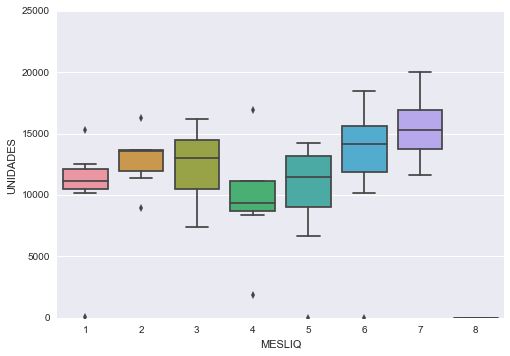

In [11]:
cajas = sns.boxplot(y ="UNIDADES", x="MESLIQ", data=pivot_powerade)

**2. Diga el tipo de variable de cada una de las columnas**

In [12]:
powerade.dtypes

ANOLIQ          int64
MESLIQ          int64
DIALIQ          int64
DIASEM         object
LOCACION       object
DISTVENTA      object
ZONAVENTA      object
RUTAVISITA     object
RUTAENTREGA    object
artnam         object
ARTNUM          int64
UNIDADES        int64
dtype: object

Las variables se pueden calificar en numéricas y categóricas, entonces:
**Numéricas:** ANOLIQ, MESLIQ, DIALIQ, ARTNUM y UNIDADES son enteros de 64 bits. Estas se dividen en discretos y continuos.
    **Discretos:** Aquí entran los valores que son limitados, por tanto entran ANOLIQ, MESLIQ, DIALIQ y ARTNUM.
    **Continuos:** Aquí entran las variables que son ilimitados, entonces solo clasifica UNIDADES.
**Categóricas:** Las demás variables que aparecen como object entran en esta categoría.
    **Nominales:** Aquí se incluyen las variables en las que sus valores son mutuamente excluyentes y no tienen orden como LOCACION, DISTVENTA, ZONAVENTA,RUTAVISITA y RUTAENTREGA
    **Ordinales:** Por último, los DIASEM tienen un orden establecido.

**3. ¿Habrá algún sabor preferido por los consumidores? Justifique su respuesta con alguno de los diagramas vistos en clase. **

Asumiendo que la cantidad de unidades vendidas es proprcional a la preferencia de los consumidores:

In [13]:
sumSabores = powerade.groupby(['artnam'], as_index=False).sum()
topSabores = sumSabores.sort_values('UNIDADES', ascending=False)
topSabores = {"Nombre del sabor": topSabores['artnam'],"Unidades vendidas": topSabores['UNIDADES']}
dfTopSabores = pd.DataFrame(topSabores)

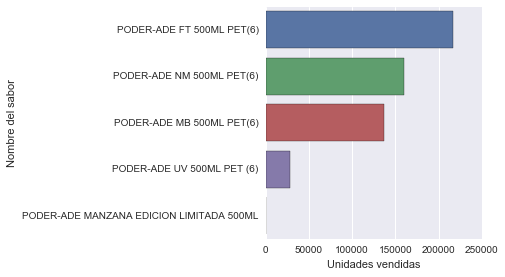

In [14]:
sns.factorplot(y="Nombre del sabor", x="Unidades vendidas", kind='bar', data=dfTopSabores, aspect=1.8) 
plt.ticklabel_format(axis='x')

**4. ¿Cuál es el ranking de los distribuidores, de acuerdo a las unidades vendidas en todo el año? **

In [15]:
sumVentasXDistribuidor = powerade.groupby(["DISTVENTA"], as_index=False).sum()
sumVentasXDistribuidor=sumVentasXDistribuidor.sort_values("UNIDADES",ascending=False)
topDistribuidores = {"Distribuidor": sumVentasXDistribuidor['DISTVENTA'],"Unidades vendidas": sumVentasXDistribuidor['UNIDADES']}
pd.DataFrame(topDistribuidores)

,Distribuidor,Unidades vendidas
4,BNK1,190687
2,BNA1,113265
3,BNA2,80710
6,BSA3,57784
0,BN03,44764
7,BSA4,37402
1,BN0Z,16942
5,BS99,354


**5. ¿Habrá algún día preferido por los consumidores? Justifique su respuesta con alguno de los diagramas vistos en clase.**

In [16]:
sumDiaSemana = powerade.groupby(['DIASEM'], as_index=False).sum()
topDiaSemana = sumDiaSemana.sort_values('UNIDADES', ascending=False)
topDiaSemana = {"Día": topDiaSemana['DIASEM'],"Unidades vendidas": topDiaSemana['UNIDADES']}
dfTopDiaSemana = pd.DataFrame(topDiaSemana)

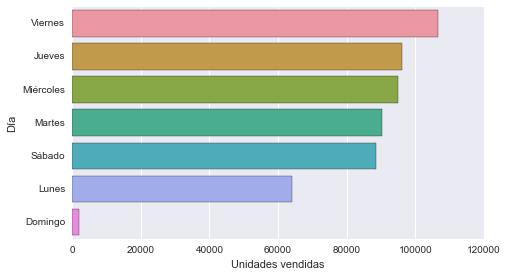

In [17]:
sns.factorplot(y="Día", x="Unidades vendidas", kind='bar', data=dfTopDiaSemana, aspect=1.8) 
plt.ticklabel_format(axis='x')

**Respuesta: **El grafico anterior evidencia que el día que más se venden refrescos es el viernes. Por lo tanto, se podría decir que el día favorito de los consumidores en cuanto a la compra de las bebidas es este.

**6. ¿Que proporción de los distribuidores demandan el 80% de las ventas de la marca? ¿Cuales son esos distribuidores? ¿Qué hipótesis encuentra congruente con este cálculo?** 

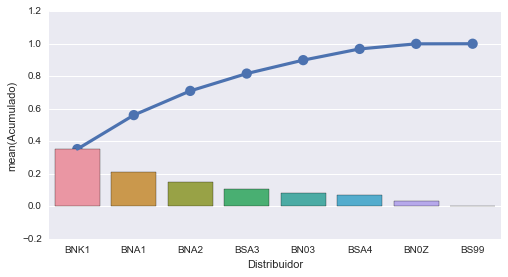

In [18]:
totalVentas=powerade["UNIDADES"].sum()
sumVentasXDistribuidor = powerade.groupby(["DISTVENTA"], as_index=False).sum()
sumVentasXDistribuidor["UNIDADES"]=sumVentasXDistribuidor["UNIDADES"]/totalVentas
sumVentasXDistribuidor=sumVentasXDistribuidor.sort_values("UNIDADES",ascending=False)
sumVentasXDistribuidor['ACUMULADO'] = sumVentasXDistribuidor['UNIDADES'].cumsum()
topDistribuidores = {"Distribuidor": sumVentasXDistribuidor['DISTVENTA'],"Unidades vendidas": sumVentasXDistribuidor['UNIDADES'], "Acumulado":sumVentasXDistribuidor['ACUMULADO']}
distribuidoresData=pd.DataFrame(topDistribuidores)
sns.factorplot(y="Unidades vendidas", x="Distribuidor", kind='bar', data=distribuidoresData, aspect=1.8) 
sns.pointplot(y="Acumulado",x="Distribuidor",data=distribuidoresData)
plt.ticklabel_format(axis='x')

El 50% de los proveedores son los que realizan el 80% de las ventas, es decir 4 de los 8 proveedores. Para el negocio esto significa que debe poner mayor esfuerzos en estos ya que le generan el 80% de la utilidad, no debe gastar mayor esfuerzo en el otro 50% pues si llegan a retirarse el impacto será mínimo. 

**7. ¿Qué proporción de las ventas son originadas en cada una de las zonas de la ciudad? ¿Qué hipótesis o reglas de negocio encuentra congruente con este cálculo? **

A partir de la proporción de ventas se puede identificar el perfil socioeconomico donde se realiza la mayor cantidad de las ventas, buscando lograr un perfil común entre las diferentes zonas 'fuertes' de la ciudad. Finalmente, el negocio puede generar reglas enfocadas a llegar a estos clientes específicos.

In [19]:
totalVentas=powerade["UNIDADES"].sum()
sumVentasXZona = powerade.groupby("ZONAVENTA")["UNIDADES"].sum()
porcVentasXZona = sumVentasXZona/totalVentas

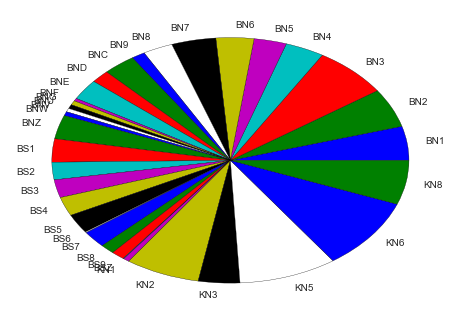

In [20]:
patches, texts = plt.pie(porcVentasXZona.values,labels=porcVentasXZona.index)

**8. ¿Existe alguna relación entre la zona de venta y los distribuidores? **

In [21]:
VentasXDistribuidorXZona = powerade.groupby(['ZONAVENTA','DISTVENTA'], as_index=False).sum()
VentasXDistribuidorXZona_pivot = VentasXDistribuidorXZona.pivot("ZONAVENTA", "DISTVENTA", "UNIDADES")
VentasXDistribuidorXZona_pivot = VentasXDistribuidorXZona_pivot.fillna(0)
VentasXDistribuidorXZona_pivot.head(3)

DISTVENTA,BN03,BN0Z,BNA1,BNA2,BNK1,BS99,BSA3,BSA4
ZONAVENTA,,,,,,,,
BN1,0.0,0.0,24281.0,0.0,0.0,0.0,0.0,0.0
BN2,0.0,0.0,27818.0,0.0,0.0,0.0,0.0,0.0
BN3,0.0,0.0,36730.0,0.0,0.0,0.0,0.0,0.0


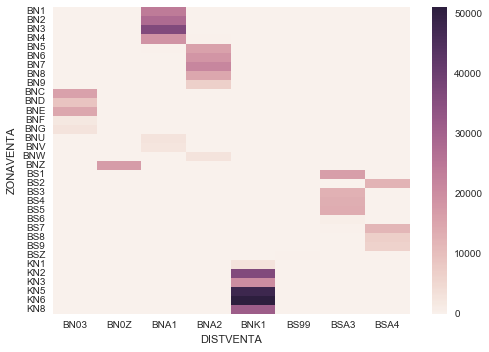

In [22]:
ax = sns.heatmap(VentasXDistribuidorXZona_pivot)

**Respuesta 1:** Según el mapa de calor, donde se analizó la variable *“cantidad de unidades vendidas”* en las dos dimensiones *ventas por zona* y *ventas por distribuidor*, cada distribuidor tiene zonas propias, es decir ningún distribuidor vende en una zona donde otro distribuidor lo haga.

**9. ¿Qué proporción de las ventas son originadas en cada uno de los días de las semanas? ¿Qué hipótesis o reglas de negocio encuentra congruente con este cálculo?**

In [23]:
porcVentasDiaSemana = {"Día": sumDiaSemana['DIASEM'],"Unidades vendidas": (sumDiaSemana['UNIDADES']/totalVentas)}
dfPorcVentasDiaSemana = pd.DataFrame(porcVentasDiaSemana)

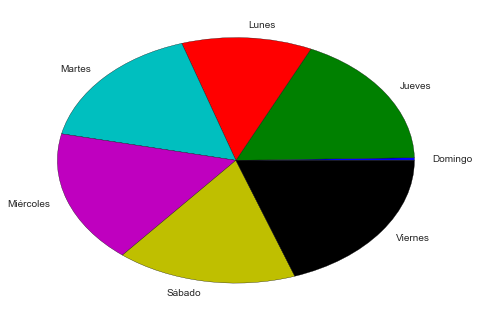

In [24]:
patches, texts = plt.pie(dfPorcVentasDiaSemana["Unidades vendidas"],labels=dfPorcVentasDiaSemana["Día"])

**Respuesta:** Según el grafico se observa que el nivel de ventas es muy similar todos días menos los domingos, esto es comportamiento no esperado según la estrategia de la compañía, la cual lanzo el producto dirigido especialmente al segmento de deportistas, se esperaría que el domingo fuera el día que más se consume la bebida.  
**Hipótesis:** Se espera que las bebidas se vendan más los días que las personas se ejercitan.

**10. ¿Existe un revisor mejor que otro? ¿Qué hipótesis o reglas de negocio encuentra congruente al responder esta pregunta?**

In [25]:
sumVentasXRevisor = powerade.groupby(['RUTAVISITA'], as_index=False).sum()
topVentasXRevisor = sumVentasXRevisor.sort_values('UNIDADES', ascending=False)

In [26]:
topVentasXRevisor = {"Cod Revisor": topVentasXRevisor['RUTAVISITA'],"Unidades vendidas": topVentasXRevisor['UNIDADES']}
dfTopVentasXRevisor = pd.DataFrame(topVentasXRevisor)

In [27]:
dfTopVentasXRevisor.head(3)

,Cod Revisor,Unidades vendidas
462,FC3K03,21588
461,FC3K02,19182
428,FC1A01,11340


In [28]:
dfTopVentasXRevisor.tail(3)

,Cod Revisor,Unidades vendidas
244,BS1119,3
317,BS2520,3
312,BS2511,2


**Respuesta:** Si partimos del hecho que el trabajo de un revisor es proporcional a la cantidad de ventas que se realizan en los sitios donde él realiza su revisión, se podría decir que el mejor es **FC3K03**. Sin embargo, se puede apreciar que la diferencia en la cantidad de ventas entre el "mejor" revisor y el "peor" es demasiado grande.
**Hipótesis**: La cantidad de ventas generadas por los revisores posee datos outliers, que muestran una mala distribución de los revisores.

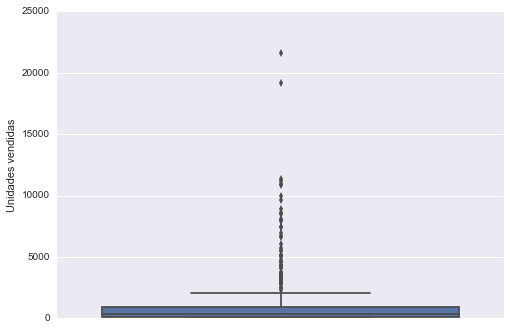

In [29]:
cajas = sns.boxplot(y ="Unidades vendidas", data=dfTopVentasXRevisor)

El diagrama de cajas muestra que la distribución de ventas por revisor está mal distribuida (los datos son muy dispersos), lo que puede ser un error de negocio, o que los datos no tienen buena calidad.

**11. Para responder la pregunta la pregunta de los directivos de Cola Loca, planteé una hipótesis para medir el éxito de ventas de PODER ADE y susténtela con análisis de estadística descriptiva. **

In [30]:
sumVentasMes = powerade.groupby(['MESLIQ'], as_index=False).sum()
topVentasMes = sumVentasMes.sort_values('MESLIQ')
topVentasMes = {"Mes": topVentasMes['MESLIQ'],"Unidades vendidas": topVentasMes['UNIDADES']}
dfTopVentasMes = pd.DataFrame(topVentasMes)
dfTopVentasMes

,Mes,Unidades vendidas
0,1,71686
1,2,77543
2,3,74247
3,4,67661
4,5,70121
5,6,87706
6,7,92938
7,8,6


Se desestima el mes 8 para el análisis, ya que se presume que no se cuenta con toda la información del mes.

In [31]:
dfTopVentasMes = dfTopVentasMes.loc[(dfTopVentasMes["Mes"] < 8)]

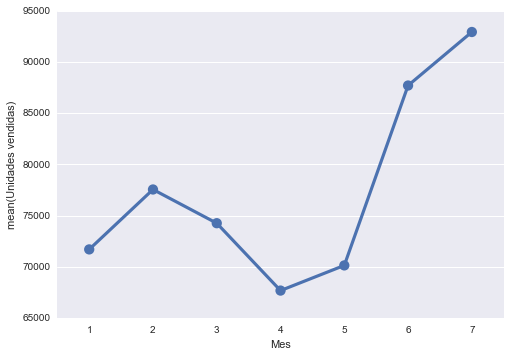

In [32]:
ax = sns.pointplot(x="Mes", y="Unidades vendidas", data=dfTopVentasMes)

Se puede ver que el negocio comienza a crecer a partir del mes 4, donde ya conociendo sus clientes va lanzando nuevos productos para generar más ventas y mantener interesados a sus clientes.
**Hipótesis:**La incorporación de nuevos sabores impulsa las ventas de la marca.

In [33]:
sumVentasMes2 = powerade.groupby(['MESLIQ','artnam'], as_index=False).sum()
topVentasMes2 = sumVentasMes2.sort_values('MESLIQ')
topVentasMes2 = {"Mes": topVentasMes2['MESLIQ'],
                 "Unidades vendidas": topVentasMes2['UNIDADES'],
                 "Sabor": topVentasMes2['artnam']}
dfTopVentasMes2 = pd.DataFrame(topVentasMes2)
#dfTopVentasMes2

In [34]:
filtro1 = (dfTopVentasMes2["Mes"] < 8)
dfTopVentasMes2 = dfTopVentasMes2.loc[filtro1]

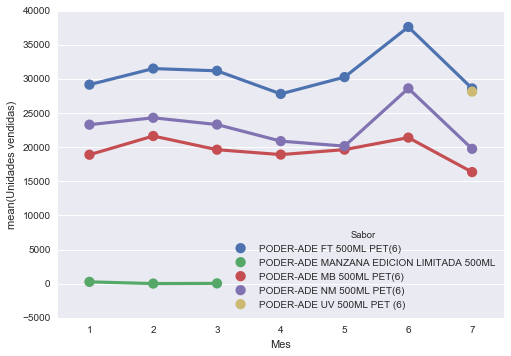

In [35]:
ax = sns.pointplot(x="Mes", y="Unidades vendidas", hue="Sabor", data=dfTopVentasMes2)

En el análisis discriminado por sabor de la bebida, se aprecia un descenso en las ventas por producto, pero esto se debe a que el mercado se redistribuyó con el nuevo sabor que se lanzó en el mes 7. También queda claro que el sabor de manzana de edición limitada fue un fracaso total, debido a que no registró ventas en sus tres meses en el mercado. (Asumiendo que es la realidad y no que es un fallo de calidad de datos)
Discriminando por sabor, las ventas están cayendo en el mes 7, sin embargo, al ver la gráfica de ventas por mes, se puede ver que en el mes 7 las ventas incrementaron a el valor más alto de los 8 meses de datos, esto prueba que la incorporación de un nuevo sabor que sea exitoso genera una ganancia para Cola Loca en ventas totales, mas también genera una disminución de ventas en sus sabores ya existentes.